In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
m = 100
X = 2*np.random.rand(m,1)
y = 4 + 3*X + np.random.randn(m,1)

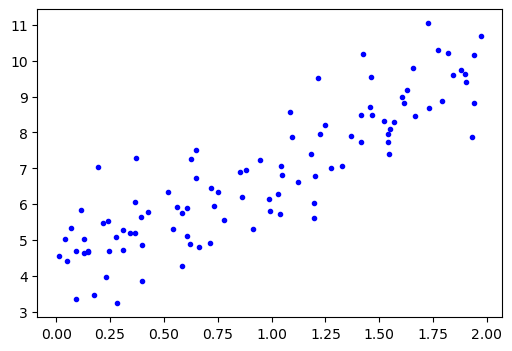

In [3]:
plt.figure(figsize = (6,4))
plt.plot(X,y,'b.');

In [4]:
matrix_a = np.array([[1,2],[3,4]])
matrix_b = np.array([[5,6],[7,8]])

result1 = matrix_a @ matrix_b
result2 = np.dot(matrix_a,matrix_b)

result1,result2

(array([[19, 22],
        [43, 50]]),
 array([[19, 22],
        [43, 50]]))

In [5]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

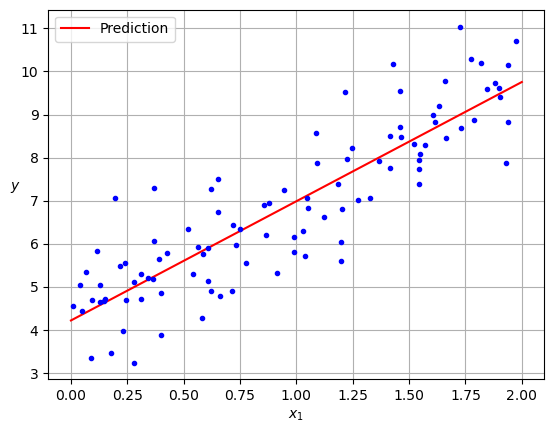

In [7]:
plt.plot(X_new,y_predict,'r-',label = 'Prediction')
plt.plot(X,y,'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation = 0)
plt.grid()
plt.legend(loc = 'upper left')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Batch Gradient Descent

In [11]:
eta = 0.1
n_epoch = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    gradients = 1/m*2* X_b.T @ (X_b @ theta - y)
    theta = theta

# Stochastic Gradient Descent (SGD)

In [13]:
np.random.seed(42)
eta = 0.1
m = len(X_b)
theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T @ (xi @ theta-yi)
        theta = theta - eta * gradients
            
    

In [14]:
theta

array([[4.17686315],
       [2.85986577]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter= 1000, tol = 0.00001, eta0 = 0.01, n_iter_no_change = 100,random_state = 42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

In [16]:
np.array([[1,2,3]]).ravel()

array([1, 2, 3])

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21353251]), array([2.77191196]))

In [18]:
sgd_reg.predict([[2]])

array([9.75735642])

# Mini - Batch GD

In [20]:
from math import ceil
n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20
n_batch_per_epoch = ceil(m/minibatch_size)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0,n_batch_per_epoch):
        idx = iteration * minibatch_size 
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradient = 2/minibatch_size * xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients


In [21]:
theta

array([[16.6611314],
       [23.5262467]])

# Polynominal Regression

In [23]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

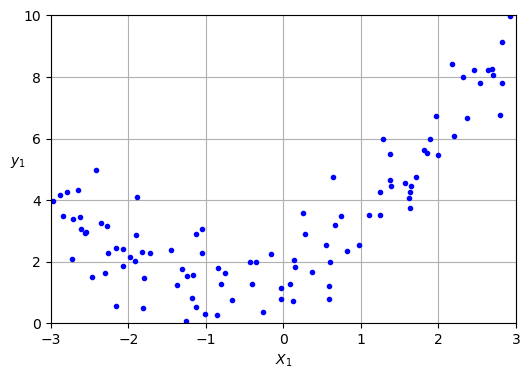

In [24]:
plt.figure(figsize = (6,4))
plt.plot(X,y,'b.')
plt.xlabel('$X_1$')
plt.ylabel('$y_1$',rotation = 0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [26]:
X_poly = poly_features.fit_transform(X)

In [27]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [29]:
lin_reg.score(X_poly,y)

0.8525067519009745

In [30]:
lin_reg.predict(X_poly[0].reshape(1,-1))

array([[1.39842532]])

In [31]:
y[0]

array([1.61761105])

In [32]:
X_new = np.linspace(-3,3,100).reshape(m,1)

In [33]:
X_new_poly = poly_features.fit_transform(X_new)

In [34]:
X_new_poly[0]

array([-3.,  9.])

In [35]:
y_new_predict = lin_reg.predict(X_new_poly)

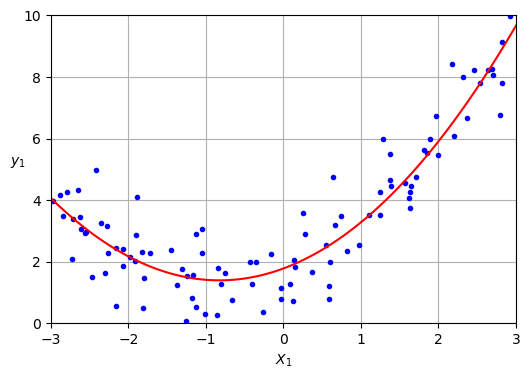

In [36]:
plt.figure(figsize = (6,4))
plt.plot(X,y,'b.')
plt.plot(X_new,y_new_predict,'r-')
plt.xlabel('$X_1$')
plt.ylabel('$y_1$',rotation = 0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

# Learning Curves

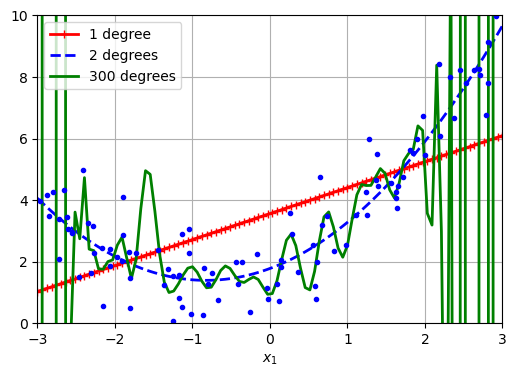

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize = (6,4))

for style,width,degree in (('r-+',2,1),('b--',2,2),('g-',2,300)):
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynominal_regression = make_pipeline(polybig_features,std_scaler,lin_reg)
    polynominal_regression.fit(X,y)
    y_newbig = polynominal_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree>1 else ''}"
    plt.plot(X_new,y_newbig,style,linewidth = width,label = label)

plt.plot(X,y,'b.',linewidth = 3)
plt.xlabel("$x_1$")
plt.legend(loc = 'upper left')
plt.grid()
plt.axis([-3,3,0,10])
plt.show()
    

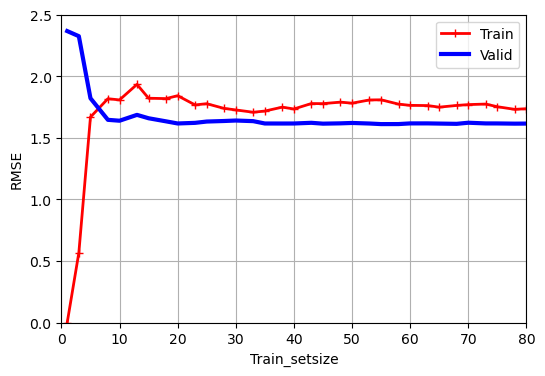

In [39]:
from sklearn.model_selection import learning_curve
train_size,train_score,valid_score = learning_curve(
  LinearRegression(),X,y,train_sizes =  np.linspace(0.01,1.0,40),cv = 50, 
    scoring = 'neg_root_mean_squared_error')

train_error = -train_score.mean(axis = 1)
valid_error = -valid_score.mean(axis = 1)

plt.figure(figsize = (6,4))
plt.plot(train_size,train_error,'r-+',linewidth = 2,label = 'Train')
plt.plot(train_size,valid_error,'b-',linewidth = 3,label = 'Valid')
plt.xlabel('Train_setsize')
plt.ylabel('RMSE')
plt.legend(loc = 'upper right')
plt.axis([0,80,0,2.5])
plt.grid();

In [40]:
train_size

array([ 1,  3,  5,  8, 10, 13, 15, 18, 20, 23, 25, 28, 30, 33, 35, 38, 40,
       43, 45, 48, 50, 53, 55, 58, 60, 63, 65, 68, 70, 73, 75, 78, 80, 83,
       85, 88, 90, 93, 95, 98])

In [41]:
train_score.shape

(40, 50)

In [42]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree = 10,include_bias = False),
                                      LinearRegression())

train_sizes,train_scores,valid_scores = learning_curve(
    polynomial_regression,X,y,train_sizes = np.linspace(0.01,1.0,40),cv = 5,
    scoring = 'neg_root_mean_squared_error')

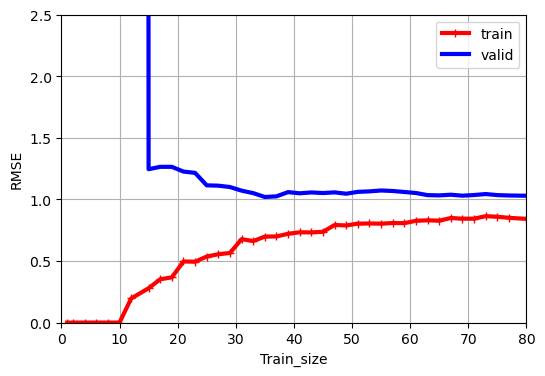

In [43]:
train_error = -train_scores.mean(axis = 1)
valid_error = -valid_scores.mean(axis = 1)

plt.figure(figsize = (6,4))
plt.plot(train_sizes,train_error,'r-+',linewidth = 3,label = 'train')
plt.plot(train_sizes,valid_error,'b-',linewidth = 3,label = 'valid')
plt.axis([0,80,0,2.5])
plt.grid()
plt.xlabel('Train_size')
plt.ylabel('RMSE')
plt.legend(loc =  'upper right')
plt.show();

# Regularized Linear Models

## Ridge Regression (L2)

In [46]:
np.random.seed(42)
m = 20
X = 3*np.random.rand(m,1)
y = 1+0.5*X + np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

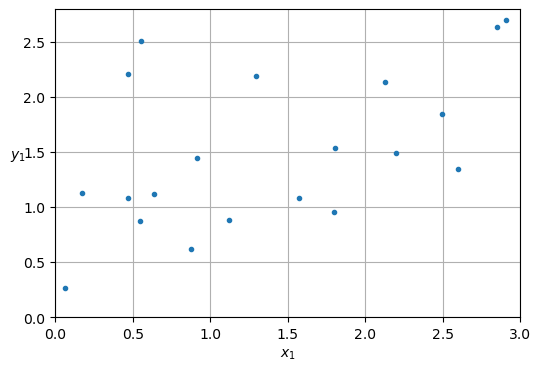

In [47]:
plt.figure(figsize = (6,4))
plt.plot(X,y,'.')
plt.xlabel('$x_1$')
plt.ylabel('$y_1$',rotation = 0)
plt.grid()
plt.axis([0,3,0,2.8])
plt.show();

In [48]:
from sklearn.linear_model import Ridge   #(l2)
ridge_reg = Ridge(alpha = 0.1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [49]:
sgd_reg = SGDRegressor(penalty = 'l2', max_iter = 1000, eta0 = 0.01, random_state = 42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## Lasso Regression (L1)

In [51]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic net 

In [53]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha = 0.1)
elastic_reg.fit(X,y)
elastic_reg.predict([[1.5]])

array([1.54333232])

# Logistic Regression

In [195]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [197]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [199]:
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [201]:
iris.data['petal length (cm)'].values

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data['petal length (cm)'].values
y = iris.target_names[iris.target] == 'virginica'
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train.reshape(-1,1),y_train)

LogisticRegression(random_state=42)

In [224]:
log_reg.score(X_test.reshape(-1,1),y_test)

1.0

In [234]:
# 

X = iris.data['petal length (cm)'].values
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

log_reg.fit(X_train.reshape(-1,1),y_train)

LogisticRegression(random_state=42)

In [241]:
log_reg.score(X_test.reshape(-1,1),y_test)

1.0